## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [39]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [40]:
#read dataset and display it
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [41]:
#count of rows for dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [42]:
#nunique with parameter(user_id)
df.user_id.nunique()

290584

d. The proportion of users converted.

In [43]:
#sum with parameter(converted) over by nunique with parameter(user_id)
df['converted'].sum()/df.user_id.nunique()

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [44]:
#first method
#df2= rows (parameter 1 = treatment & parameter2 = new_page)
df2 = df.query("group == 'treatment' & landing_page == 'new_page'").shape[0]
#df3= rows (parameter 1 = control & parameter2 = old_page)
df3 = df.query("group == 'control' & landing_page == 'old_page'").shape[0]
#df4=count rows of df2 & df3 
df4 = df2 + df3
#dataset rows - df4_rows
df.shape[0] - df4

3893

In [45]:
#second method
#df2= rows (parameter 1 = treatment & parameter2 = old_page)
df2 = df.query("group == 'treatment' & landing_page == 'old_page'").shape[0]
#df3= rows (parameter 1 = control & parameter2 = new_page)
df3 = df.query("group == 'control' & landing_page == 'new_page'").shape[0]
#count of df2 & df3 
df2 + df3

3893

f. Do any of the rows have missing values?

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [47]:
# count rows with parameter1 = control & parameter2 = old page
df.query("group == 'control' & landing_page == 'old_page'").shape[0]

145274

In [48]:
#count rows with parameter1 = treatment & parameter2 = new_page
df.query("group == 'treatment' & landing_page == 'new_page'").shape[0]

145311

In [49]:
#df2=new dataset where
#all rows with parameter1 = control & parameter2 = old page
df2 = df.query("group == 'control' and landing_page == 'old_page'")
#all rows with parameter1 = treatment & parameter2 = new_page
df2 = df2.append(df.query("group == 'treatment' & landing_page == 'new_page'"))

In [50]:
#double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [51]:
#new dataset total rows 
df2.shape[0]

290585

In [52]:
#double Check other method
df.shape[0] - df2.shape[0]

3893

a. How many unique **user_id**s are in **df2**?

In [53]:
#nunique with parameter(user_id) in new dataset df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [54]:
#duplicated with parameter(user_id) in df2
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [55]:
#select where parameter(user_id) = (773192) or (duplicated rows for user_id = 773192)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [56]:
#drop row number(2893) in df2
df2 = df2.drop(2893)

a. What is the probability of an individual converting regardless of the page they receive?

In [57]:
#mean with parameter converted
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [58]:
#select parameter1 = control & mean with parameter2 = converted
df_cont_avg_conv = df2.query("group == 'control'")['converted'].mean()
df_cont_avg_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [59]:
#select parameter1 = treatment & mean with parameter2 = converted
df_treat_avg_conv = df2.query("group == 'treatment'")['converted'].mean()
df_treat_avg_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [60]:
#select rows parameter = new page / count rows for new dataset (df2)
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No more conversions, the new page achieved a lower conversion rate compared to the old page, however the difference is very low.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* <i>H0 </i>: **$p_{old}$** = **$p_{new}$**
* <i>H1 </i>: **$p_{old}$** > **$p_{new}$**
<p>Our alternative hypothesis is what we want to prove to be true, that the new homepage design has a hight conversion rate than the old homepage design.</p>
And the null hypothesis is what we assume to be true before analyzing data, which is that the new homepage design has conversion rate is less than or equal to that of the old homepage design.
can rearrange our hypotheses to look like this:

* <i>H0 </i>: **$p_{old}$** - **$p_{new} = 0$**
* <i>H1 </i>: **$p_{new}$** - **$p_{old} > 0$**

2. Assume under the null hypothesis,  pnew  and  pold  both have "true" success rates equal to the converted success rate regardless of page - that is  pnew  and  pold  are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page.


Use a sample size for each page equal to the ones in ab_data.csv.


Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [61]:
#mean with parameter converted in df2
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [62]:
#mean with parameter converted in df2
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [63]:
#count rows for parameter = new_page in df2
n_new = df2.query("landing_page == 'new_page'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [64]:
#count rows for parameter = old_page in df2
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [65]:
# results from N-new = 145310 with P-new = 0.1195
np.random.binomial(1, p_new, n_new)

array([0, 0, 0, ..., 0, 0, 1])

df_new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [66]:
# results from N-old = 145274 with P-old = 0.1195
np.random.binomial(1, p_old, n_old)

array([0, 0, 0, ..., 0, 1, 0])

df_old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [67]:
#Numpy array called p_diffs.
p_diffs = []
#proportion of results from N-new with P-new #10,000 iterations
df_new_converted = np.random.binomial(n_new, p_new, 10000)/n_new
#proportion of results from N-old with P-old #10,000 iterations
df_old_converted = np.random.binomial(n_old, p_old, 10000)/n_old
#create a sampling distribution of the difference in proportions
p_diffs = df_new_converted - df_old_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

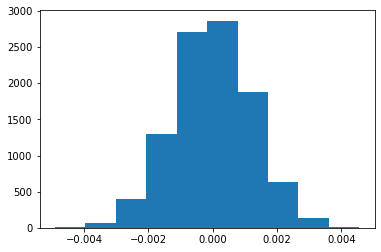

In [68]:
#Plot sampling distribution
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [69]:
#for a two sided hypothesis, we want to look at anything 
#more extreme from the null in both directions
#compute the observed difference
obs_diff = df_treat_avg_conv - df_cont_avg_conv
#probability of a statistic lower than observed
min_p = (p_diffs > obs_diff).mean()
#probability a statistic is more extreme higher
max_p = (p_diffs.mean() + (p_diffs.mean() - obs_diff) > p_diffs).mean()

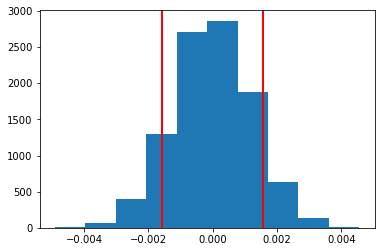

In [70]:
lower_bound = obs_diff
upper_bound = p_diffs.mean() + (p_diffs.mean() - obs_diff)

plt.hist(p_diffs);
plt.axvline(lower_bound, color='r', linewidth=2);
plt.axvline(upper_bound, color='r', linewidth=2);

In [71]:
print(upper_bound, lower_bound)

0.0015759397637897105 -0.0015782389853555567


In [72]:
min_p = (p_diffs > lower_bound).mean()
max_p = (upper_bound < p_diffs).mean()

In [73]:
print(max_p, min_p)

0.1001 0.9034


In [74]:
#compute p-value
p_value = min_p + max_p
print(p_value)

1.0035


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* The p-value is (0.9973) higher than (0.05) & accordingly we can make the decision to fail to reject the null hypothesis.
* In case the P-value less than (0.05), that is refer to very low probability of assuming the null hypothesis is true, which lead to reject it.
* Obtaining the P-value for both directions because the alternative hypothesis like flip the coin, Meaning either a positive(H) or negative value(T).

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [75]:
import statsmodels.api as sm;

convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [76]:
#from statsmodels.stats.proportion import proportions_ztest
#stat, pval = proportions_ztest(counts, nobs,alternative='smaller')
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

* The Z score is (1.3109) between (-1.96 & +1.96), So can't reject null hypothsis.
* The P-value is (0.9050) higher than (0.05), So can't reject null hypothsis.
* The P-value is (0.9050) is almost same of or littel than the previous p-value.
* The Z-test confirms the previous result.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [77]:
#Technical error when run code-results.summary() 
#get error (AttributeError: module 'scipy.stats' has no attribute 'chisqprob')
#this code to solve the problem
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [78]:
#add column intercept & insert value = 1
df2['intercept'] = 1
#add 2 dummy variables to be the length =  group column length
df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])
#drop baseline column(a_page)
df2 = df2.drop('a_page', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [79]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [80]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:               8.077e-06
Time:                        22:57:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

* The P-value associated with ab_page is (0.190 )here, which is almost same or littel higher than previous P-values.
* This model is for predict if the user will convert depending on their page. .
* The null hypothesis is when (ab_page = 1-converted = 0).
* The alternative hypothesis is that when (ab_page = 1-converted =1).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

###### It not seems treatment or control page has much impact on whether a user converts. So, it is a good idea to see whether other factors might predict conversion. It is important to be when selecting factors to make sure the factors are not in and of themselves colinear.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [81]:
df = pd.read_csv('countries.csv')
df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [82]:
#df2 = df.set_index('key').join(other.set_index('key'))
df2 = df2.set_index('user_id').join(countries.set_index('user_id'))

In [83]:
#add 3 dummy variables to be the length =  country column length
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])

In [84]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:               2.323e-05
Time:                        22:58:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [85]:
#create 3columns(country*ab_page)
df2['CA_page'] = df2['CA']*df2['ab_page']
df2['UK_page'] = df2['UK']*df2['ab_page']
df2['US_page'] = df2['US']*df2['ab_page']
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'CA_page', 'UK_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:               2.364e-05
Time:                        22:58:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_page       -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_page        0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

In [86]:
np.exp(results.params)


intercept    0.135840
CA_page      0.927579
UK_page      1.015000
dtype: float64

In [87]:
1/_

intercept    7.361591
CA_page      1.078076
UK_page      0.985222
dtype: float64

<a id='conclusions'></a>
## Conclusions

* P-value here as statistically significant: the interaction of CA and ab_page (p = 0.046; p < 0.05).
* The calculation explain the CA_page coefficient with holding all other variables constant.
* The user from Canada who gets the new page would be about 1.08 times more likely to convert. While this holds a small amount of statistical significance, Since it is also the only value of statistical significance
* When ab_page and country were insignificant on their own, it is unlikely to be of any real use to us.
* last but not least, we do not have enough evidence to reject the null hypothesis according to the A/B test results.
* Finaly the decision is, no benefits from conversion to the new page, when the old page still on host

### Refrances:
* https://stackoverflow.com
* https://pandas.pydata.org
* https://www.python.org


In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1